# Deep learning framework example: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.

Before you run this notebook, you must ensure the corpus is installed.  Please see the `README.md` file for more information.

**Important**: Please see the Iris notebook example in the `zensols.deeplearn` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
app_root_dir = '..'
sys.path.append(app_root_dir + '/src')
# add the deepnlp path
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from movie import AppConfig, ReviewModelFacade

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(config_file=app_root_dir + '/resources/movie.conf', env={'app_root': app_root_dir})

def create_facade():
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = ReviewModelFacade(config)
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: Review
  feature splits:
    split stash splits:


2021-03-18 17:06:08,209[INFO]zensols.multi.stash: feature_factory_stash: spawning work with chunk size 1402 across 8 workers


        dev: 1029 (9.2%)
        test: 2099 (18.7%)
        train: 8086 (72.1%)
        total: 11214


2021-03-18 17:06:08,304[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 2 in 0s
2021-03-18 17:06:08,303[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 0 in 0s
2021-03-18 17:06:08,306[INFO]zensols.multi.stash: processing chunk 2 with stash <class 'movie.domain.ReviewFeatureStash'>
2021-03-18 17:06:08,306[INFO]zensols.multi.stash: processing chunk 0 with stash <class 'movie.domain.ReviewFeatureStash'>
2021-03-18 17:06:08,306[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 1 in 0s
2021-03-18 17:06:08,310[INFO]zensols.multi.stash: processing chunk 1 with stash <class 'movie.domain.ReviewFeatureStash'>
2021-03-18 17:06:08,309[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 3 in 0s
2021-03-18 17:06:08,312[INFO]zensols.multi.stash: factory inst feature_factory_stash for chunk 4 in 0s
2021-03-18 17:06:08,315[INFO]zensols.multi.stash: processing chunk 3 with stash <class 'movie.domain.ReviewFeatureStash

    total this instance: 11214
    keys consistent: True
  batch splits:
    split stash splits:
        dev: 6 (10.3%)
        test: 11 (19.0%)
        train: 41 (70.7%)
        total: 58


2021-03-18 17:06:41,857[INFO]zensols.multi.stash: factory inst batch_stash for chunk 0 in 0s
2021-03-18 17:06:41,859[INFO]zensols.multi.stash: processing chunk 0 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2021-03-18 17:06:41,859[INFO]zensols.multi.stash: factory inst batch_stash for chunk 2 in 0s
2021-03-18 17:06:41,861[INFO]zensols.multi.stash: processing chunk 2 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2021-03-18 17:06:41,861[INFO]zensols.multi.stash: factory inst batch_stash for chunk 1 in 0s
2021-03-18 17:06:41,863[INFO]zensols.multi.stash: processing chunk 1 with stash <class 'zensols.deeplearn.batch.stash.BatchStash'>
2021-03-18 17:06:42,216[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file: ../corpus/glove/bin/6B.300/vec
2021-03-18 17:06:42,219[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file: ../corpus/glove/bin/6B.300/vec
2021-03-18 17:06:42,224[INFO]zensols.deepnlp.embed.wordtext: reading binary vector file:

    total this instance: 58
    keys consistent: True
    delegate:
      name: batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 200
      data_point_id_sets_path: ../data/batch/batch-point-keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'label', 'glove_50_embedding'}
      priming: False
  network settings:
    name: net_settings
    dropout: 0.2
    recurrent_settings:
      name: recurrent_settings
      dropout: 0.2
      network_type: lstm
      aggregation: max
      bidirectional: True
      hidden_size: 36
      num_layers: 1
    linear_settings:
      name: linear_settings
      dropout: 0.2
      out_features: 2
      middle_features:
        10
      proportions: True
      repeats: 1
  model settings:
    name: model_settings
    path: ../target/model
    learning_rate: 0.001
    epochs: 3
    max_consecutive_increased_count: 9223372036854775807
    nominal_la

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2021-03-18 17:09:12,605[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-03-18 17:09:12,606[INFO]zensols.deeplearn.model.facade: training...
2021-03-18 17:09:12,608[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-03-18 17:09:15,518[INFO]zensols.deeplearn.model.executor.status: loaded 47 batches in 2s
2021-03-18 17:09:15,519[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2021-03-18 17:09:15,523[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-03-18 17:09:15,538[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]2021-03-18 17:09:15,542[INFO]zensols.deeplearn.model.executor.status: watching update file

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 03/18/2021 17:09:15:542741
    ended: 03/18/2021 17:09:17:971438
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 2/2
    ave/min loss: 165.14428/54.16680
    accuracy: 0.169 (1367/8086)
    micro: F1: 0.169, precision: 0.169, recall: 0.169
    macro: F1: 0.168, precision: 0.168, recall: 0.169
    weighted: F1: 0.168, precision: 0.168, recall: 0.169
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 2/2
    ave/min loss: 119.53735/17.43206
    accuracy: 0.498 (512/1029)
    micro: F1: 0.498, precision: 0.498, recall: 0.498
    macro: F1: 0.332, precision: 0.249, recall: 0.500
    weighted: F1: 0.331, precision: 0.248, recall: 0.498
  test:
    started: 03/18/2021 17:09:18:284090
    ended: 03/18/2021 17:09:18:335712
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 132.70430/60.25941
    accuracy: 0.507 (10

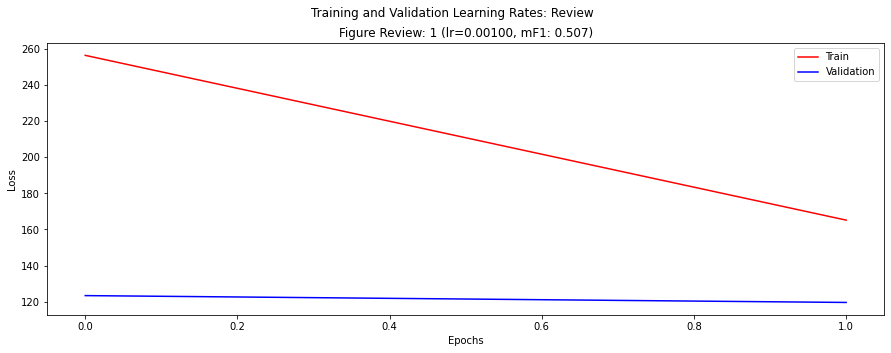

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2021-03-18 17:09:18,959[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-03-18 17:09:18,960[INFO]zensols.deeplearn.model.facade: training...
2021-03-18 17:09:18,961[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2021-03-18 17:09:18,962[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2021-03-18 17:09:18,980[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-03-18 17:09:18,996[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 70 epochs using learning rate 0.001
  0%|                                                                                            | 0/70 [00:00<?, ?it/s]2021-03-18 17:09:18,998[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:116.101|va min:93.001|va:93.195 /\: 100%|██████████████████████████

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 03/18/2021 17:09:18:999509
    ended: 03/18/2021 17:11:12:034973
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 68/70
    ave/min loss: 115.23280/28.65804
    accuracy: 0.682 (5516/8086)
    micro: F1: 0.682, precision: 0.682, recall: 0.682
    macro: F1: 0.681, precision: 0.686, recall: 0.682
    weighted: F1: 0.681, precision: 0.686, recall: 0.682
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 67/70
    ave/min loss: 93.00116/13.02388
    accuracy: 0.732 (753/1029)
    micro: F1: 0.732, precision: 0.732, recall: 0.732
    macro: F1: 0.731, precision: 0.737, recall: 0.732
    weighted: F1: 0.730, precision: 0.737, recall: 0.732
  test:
    started: 03/18/2021 17:11:12:711042
    ended: 03/18/2021 17:11:12:763327
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 107.32888/47.19230
    accuracy: 0.706 

movie.model.ReviewNetwork (2)

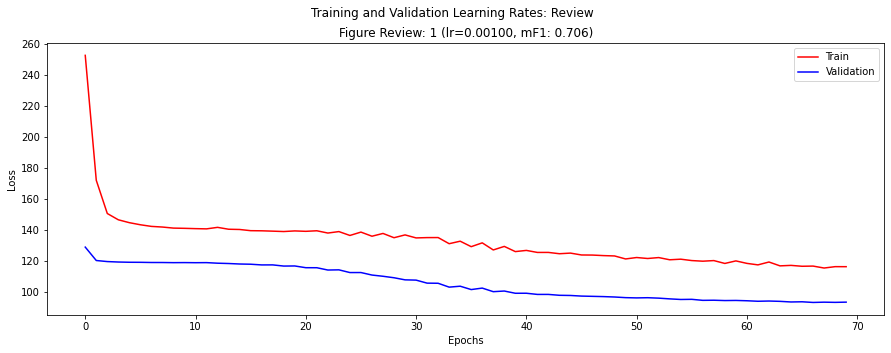

In [5]:
facade.learning_rate = 0.001
facade.epochs = 70
facade.dropout = 0.3
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2021-03-18 17:11:13,070[INFO]zensols.deepnlp.embed.word2vec: reading binary vector file
2021-03-18 17:11:13,071[INFO]zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
2021-03-18 17:13:01,573[INFO]zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 1 minute, 48s
2021-03-18 17:13:01,574[INFO]zensols.deepnlp.embed.word2vec: loaded word2vec model in 1 minute, 48s
2021-03-18 17:13:13,346[INFO]zensols.deepnlp.embed.word2vec: created data structures in 11s
2021-03-18 17:13:15,703[INFO]zensols.deepnlp.embed.domain: created tensor vectory matrix on use cuda: False, device: cpu
2021-03-18 17:13:16,807[INFO]zensols.deeplearn.model.facade: clearing
2021-03-18 17:13:16,823[INFO]zensols.deeplearn.model.facade: creating new executor
2021-03-18 17:13:16,831[INFO]zensols.deepnlp.embed.domain: reusing already cached from use cuda: False, 

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 03/18/2021 17:13:22:524890
    ended: 03/18/2021 17:14:47:919570
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 60/60
    ave/min loss: 82.62709/10.99606
    accuracy: 0.796 (6438/8086)
    micro: F1: 0.796, precision: 0.796, recall: 0.796
    macro: F1: 0.795, precision: 0.802, recall: 0.796
    weighted: F1: 0.795, precision: 0.802, recall: 0.796
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 50/60
    ave/min loss: 84.31030/8.87944
    accuracy: 0.765 (787/1029)
    micro: F1: 0.765, precision: 0.765, recall: 0.765
    macro: F1: 0.764, precision: 0.769, recall: 0.765
    weighted: F1: 0.764, precision: 0.769, recall: 0.765
  test:
    started: 03/18/2021 17:14:52:037898
    ended: 03/18/2021 17:14:52:095198
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 90.32838/36.03019
    accuracy: 0.772 (16

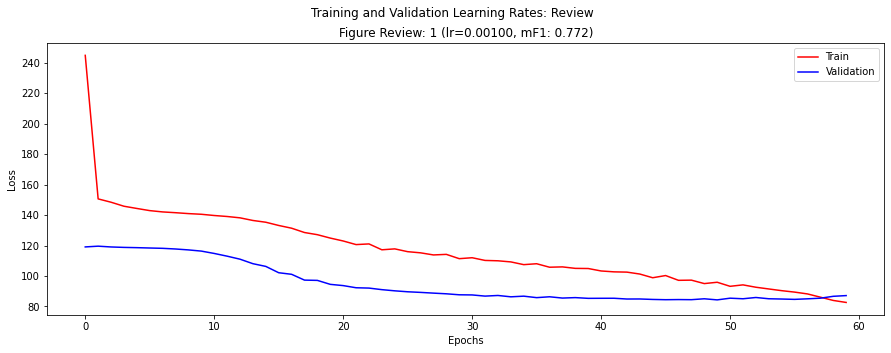

In [6]:
facade.epochs = 60
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

2021-03-18 17:14:58,768[INFO]zensols.deeplearn.model.facade: clearing
2021-03-18 17:14:58,778[INFO]zensols.deeplearn.model.facade: creating new executor
2021-03-18 17:14:58,820[INFO]zensols.deeplearn.model.executor.status: resetting executor
2021-03-18 17:14:58,820[INFO]zensols.deeplearn.model.facade: training...
2021-03-18 17:14:58,834[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2021-03-18 17:18:34,453[INFO]zensols.deeplearn.model.executor.status: loaded 47 batches in 3 minutes, 35s
2021-03-18 17:18:34,454[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2021-03-18 17:18:34,459[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2021-03-18 17:18:34,461[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 60 epochs using learning rate 0.001
  0%|                                       

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 03/18/2021 17:18:34:464172
    ended: 03/18/2021 17:19:50:734426
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 60/60
    ave/min loss: 44.07925/11.11773
    accuracy: 0.895 (7241/8086)
    micro: F1: 0.895, precision: 0.895, recall: 0.895
    macro: F1: 0.895, precision: 0.901, recall: 0.896
    weighted: F1: 0.895, precision: 0.901, recall: 0.895
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 36/60
    ave/min loss: 66.40810/7.06893
    accuracy: 0.816 (840/1029)
    micro: F1: 0.816, precision: 0.816, recall: 0.816
    macro: F1: 0.815, precision: 0.825, recall: 0.817
    weighted: F1: 0.815, precision: 0.825, recall: 0.816
  test:
    started: 03/18/2021 17:20:40:589048
    ended: 03/18/2021 17:20:40:708126
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 78.86705/30.34977
    accuracy: 0.810 (17

movie.model.ReviewNetwork (2)

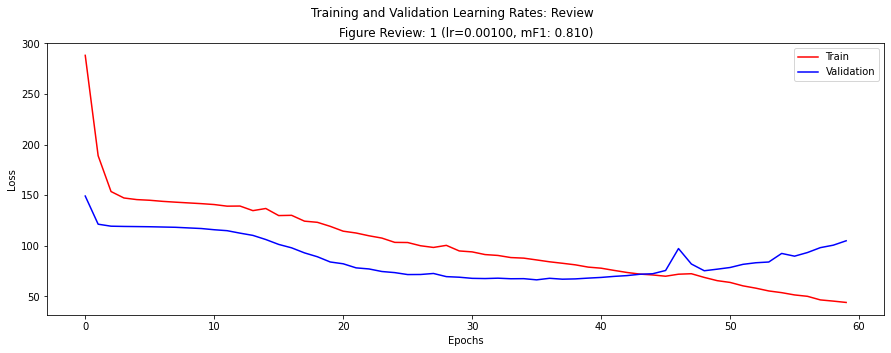

In [7]:
facade.epochs = 60
facade.embedding = 'bert_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()